In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from pandas.api.types import is_string_dtype, is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Graph
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import plotly.express as px
from datetime import date 


In [2]:
df = pd.read_csv('Car_Insurance_Claim.csv', index_col = 0)

In [3]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.shape

(10000, 18)

In [5]:
df.columns.to_list()

['AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'VEHICLE_TYPE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

In [6]:
df.dtypes

AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [7]:
# drop duplicates

df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.shape

#lost 22 results due to duplicates

(9988, 18)

In [9]:
# let's lowercase all columns 

df.columns= df.columns.str.lower()

In [14]:
df.head(1)

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0


In [17]:
df.gender.value_counts()

female    5003
male      4985
Name: gender, dtype: int64

<AxesSubplot:>

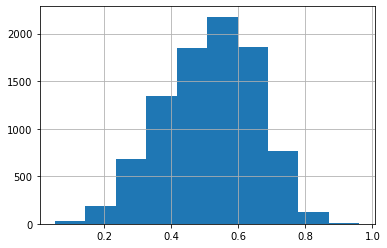

In [18]:
df.credit_score.hist()

In [21]:
# need to deal with object data types and convert using get dummies

dummies = pd.get_dummies(df[['gender', 'race', 'education', 'income']])

# create a dropcols where all columns that were created into dummies will be dropped
dropcols = ['gender', 'race', 'education', 'income']
    
# drop cols from above
df.drop(columns=dropcols, inplace=True)
    
# combine the original data frame with the new dummies columns
df = pd.concat([df, dummies], axis=1)

In [22]:
df.head()

,age,driving_experience,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,...,gender_male,race_majority,race_minority,education_high school,education_none,education_university,income_middle class,income_poverty,income_upper class,income_working class
ID,,,,,,,,,,,,,,,,,,,,,
569520,65+,0-9y,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,...,0,1,0,1,0,0,0,0,1,0
750365,16-25,0-9y,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,...,1,1,0,0,1,0,0,1,0,0
199901,16-25,0-9y,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,...,0,1,0,1,0,0,0,0,0,1
478866,16-25,0-9y,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,...,1,1,0,0,0,1,0,0,0,1
731664,26-39,10-19y,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,...,1,1,0,0,1,0,0,0,0,1



def explore_univariate(df, figsize = (18,3)):
    '''
    This function is for exploring. Takes in a dataframe with variables you would like to see the box plot of.
    Input the dataframe (either fully, or using .drop) with ONLY the columns you want to see plotted.
    Optional arguement figsize. Default it's small.    
    '''

    for col in list(df):
        plt.figure(figsize=figsize)
        plt.subplot(121)
        sns.boxplot(x = col, data = df)
        plt.title(f'Box Plot of {col}')

        plt.subplot(122)
        sns.histplot(data = df, x = col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# after train/test/split, this is another way to explore data

target = ('input variable')

variables = list(train.drop(columns = target))



def plot_box_against_target(df, target, var_list, figsize = (10,5), hue = None):
    '''
    This function takes in a dataframe, target name, and Var List
    Will loop through variables (makes sure it's not an Object)
    And plot them
    '''
    
    for var in var_list:
        
        if df[var].dtypes != 'O':
            # create box plot
            plt.figure(figsize = figsize)
            sns.boxplot(data = df, x = target, y = var, palette=wine_palette2)
            plt.title(f'{var} and {target}')
            
            mean = round(df[var].mean(),2)
            plt.axhline(mean, c = 'yellow', lw = 4, alpha = .8)
            plt.show()
            
            print(f'Overall mean for {var} is: {mean}')
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')